<h1><center>NLP: IMDb Sentiment analysis</center></h1>
<h3><center>Presented by: Altaf Ur Rahman</center></h3>


***
*This notebook presents sentiment analysis on IMDB Dataset. The data set consist of balanced positive and negative 50000 samples. Data is split into training/testing sets with a ratio of 70/30. The data was pre processed and then fed to a Logistic Regression Classifier. Overall we got close to 90% accuracy. Finally we can test the model with a custom query.*
***
Following are the sections of this notebook, 

**Step 01:** *Importing librararies*\
**Step 02:** *Reading and visualizing the data*\
**Step 03**: *Data Pre Processing* \
&emsp; &emsp;(1) *Adding word count to the DataFrame*\
&emsp; &emsp;  (2) *Replace sentiments with numerical values* \
&emsp; &emsp;  (3) *Text Cleaning*\
&emsp; &emsp;   (4) *Remove Duplicate reviews*\
&emsp; &emsp;   (5) *Reduce words to their roots*\
&emsp; &emsp;   (6) *Count the new word count and replace it in the DataFrame* \
&emsp; &emsp;   (7) *Applying TFIDF to the data*\
&emsp; &emsp;  (8) *Splitting the data into training and testing sets*\
**Step 04:** *Training and Testing the model*\
**Step 05:** *Testing with custom Input*

***

<center> Step 01: Importing librararies </center>

***

In [1]:
# Turn off warnings
import warnings
warnings.filterwarnings("ignore")
import re

# Data loading and plotting libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import NLP related libraries
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud

# Import Models etc

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split


*** 
<center> Step 02: Read the DataSet and Visualize it </center>

***

In [2]:
DS = pd.read_csv('IMDB Dataset.csv')
print ('No of examples : ', DS.shape[0])
DS.head()

No of examples :  50000


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


Text(0.5, 1.0, 'Count of Positive and negative Sentiments')

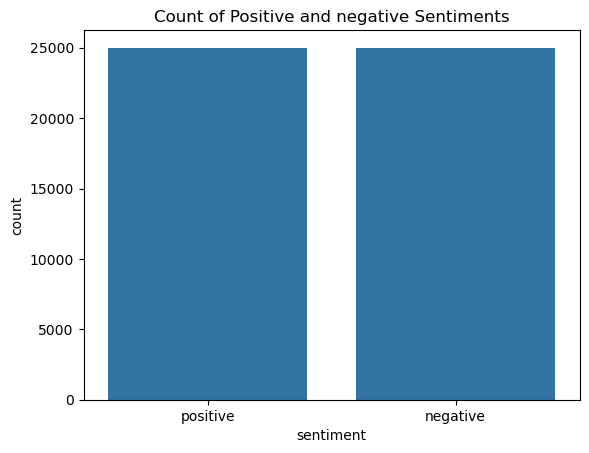

In [3]:
# We have a balance dataset of positive and negative examples
sns.countplot(x= 'sentiment', data = DS)
plt.title("Count of Positive and negative Sentiments")


***

**Step 03**: *Data Pre Processing* \
&emsp; &emsp;(1) *Adding word count to the DataFrame*\
&emsp; &emsp;  (2) *Replace sentiments with numerical values* \
&emsp; &emsp;  (3) *Text Cleaning*\
&emsp; &emsp;   (4) *Remove Duplicate reviews*\
&emsp; &emsp;   (5) *Reduce words to their roots*\
&emsp; &emsp;   (6) *Count the new word count and replace it in the DataFrame* \
&emsp; &emsp;   (7) *Applying TFIDF to the data*\
&emsp; &emsp;  (8) *Splitting the data into training and training sets*
***

In [4]:
# (1) Adding word count to the dataframe
def no_of_words(text):
    words= text.split()
    word_count = len(words)
    return word_count

DS['word count'] = DS['review'].apply(no_of_words)
DS.head()

,review,sentiment,word count
0,One of the other reviewers has mentioned that ...,positive,307
1,A wonderful little production. <br /><br />The...,positive,162
2,I thought this was a wonderful way to spend ti...,positive,166
3,Basically there's a family where a little boy ...,negative,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230


In [5]:
#(2) Replace sentiments with numerical values
DS.sentiment.replace("positive", 1, inplace=True)
DS.sentiment.replace("negative", 0, inplace=True)

In [6]:
# (3):  Text Cleaning

def Text_Cleaning(text):
# convert text to lowercase
    text= text.lower()
# remove <br /> from text
    text = re.sub('<br />', '', text)
# remove links starting with https, www, and http. remove if it also extends to multiple lines
    text = re.sub(r"https\S+|www\S+|http\S+", '', text, flags = re.MULTILINE)
# remove text with @words and hashtags #
    text = re.sub(r'\@w+|\#', '', text)
# remove non word and non white space characters
    text = re.sub(r'[^\w\s]', '', text)


# split the text into individual words
    text_tokens = word_tokenize(text)
#remove words that carry out little meaning in NLP Tasks
    filtered_text = [w for w in text_tokens if not w in stop_words]
# return the filtered words separated by spaces
    return " ".join(filtered_text)

Orig_rev_sample =  DS.iloc[0][0]

# apply pre_processing to the data review column
DS.review = DS['review'].apply(dText_Cleaning)
Clean_rev_sample = DS.iloc[0][0]

# lets see sample of original and clean text
print( 'Original review: ', Orig_rev_sample, '\n')
print( 'Processed review: ', Clean_rev_sample)


Original review:  One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show

In [7]:
# (4) Remove duplicate reviews

# show duplicatereviews
duplicated_count = DS.duplicated().sum()
print("Number of duplicate entries: ", duplicated_count)

# drop duplicate reviews
df = DS.drop_duplicates('review')

Number of duplicate entries:  421


In [8]:
# (5) Reduce words to their roots
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

# Apply stemming to the data
DS.review = DS['review'].apply(lambda x: stemming(x))

In [9]:
#(6) Count the number of words and replace in the dataframe
DS['word count'] = DS['review'].apply(no_of_words)
DS.head()

,review,sentiment,word count
0,one reviewers mentioned watching 1 oz episode ...,1,168
1,wonderful little production filming technique ...,1,84
2,thought wonderful way spend time hot summer we...,1,86
3,basically theres family little boy jake thinks...,0,67
4,petter matteis love time money visually stunni...,1,125


In [10]:
# (7): Applying TFIDF to the data
X = DS['review']
Y = DS['sentiment']
vect = TfidfVectorizer()
X = vect.fit_transform(DS['review'])

In [11]:
# (8) Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
print("Size of x_train: ", (x_train.shape))
print("Size of y_train: ", (y_train.shape))
print("Size of x_test: ", (x_test.shape))
print("Size of y_test: ", (y_test.shape))


Size of x_train:  (35000, 221707)
Size of y_train:  (35000,)
Size of x_test:  (15000, 221707)
Size of y_test:  (15000,)


***

<center> Step 04 : Training and Testing the model </center>

***


In [12]:
# Training and Testing 
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 89.57%


In [13]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))


[[6563  848]
 [ 717 6872]]


              precision    recall  f1-score   support

           0       0.90      0.89      0.89      7411
           1       0.89      0.91      0.90      7589

    accuracy                           0.90     15000
   macro avg       0.90      0.90      0.90     15000
weighted avg       0.90      0.90      0.90     15000



In [16]:
x = str(input())
#x  = x.np.reshape([1,-1])
x= stemming([x])
X = vect.transform(x)
#X = X.reshape([-1,1])
y = logreg.predict(X)
print("\n")
if y==1:
    print ( "positive review" )
else:
    print("Negative Review")


 the movie is good




positive review
